## Introduction to Neural Networks - Fraud Detection

Nilson reports that U.S. card fraud (credit, debt, etc) was reportedly \$9 billion in 2016 and expected to increase to \$12 billion by 2020. For perspective, in 2017 both PayPal's and Mastercard's revenue was only $10.8 billion each.


**Objective:** In this notebook, given the credit card transactions, we will build a simple neural network (i.e., Multilayer perceptrons) for Fraud Detection using Keras.

This notebooks covers,

1. Creating a Model

2. Adding Layers

3. Activations

4. Optimizers and Loss functions

5. Evaluation

### Dataset Description

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, the original features and more background information about the data is not provided. Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Source: https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
#%tensorflow_version 2.x

In [1]:
import tensorflow as tf
tf.keras.__version__

c:\users\gaurav.das\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\gaurav.das\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\gaurav.das\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\u

'2.2.4-tf'

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import classification_report, roc_curve, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
from tensorflow.keras import optimizers

In [5]:
dataset_file = r'D:\PERSONAL DATA\GREAT LEARNING\Course Online\Module 8 - Intro to Neural Networks and Deep Learning\Week 2\creditcard.csv'

In [6]:
data = pd.read_csv(dataset_file)

In [7]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [8]:
data.shape

(284807, 31)

In [9]:
data = data.drop("Time", axis = 1)

In [10]:
data.isnull().any().sum()

0

In [12]:
data = data.dropna()

In [13]:
X_data = data.iloc[:, :-1] # the last column is the dependent variable

In [14]:
X_data.shape

(284807, 29)

In [15]:
X_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [16]:
y_data = data.iloc[:, -1]

In [17]:
y_data.shape

(284807,)

In [18]:
y_data.value_counts(normalize = True)#.plot(kind = 'bar') #highly imbalanced

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [32]:
#type(y_data.value_counts())

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.2, random_state = 7)

In [21]:
X_train = preprocessing.normalize(X_train) # normalizing the training set 

In [22]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [23]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(227845, 29)
(56962, 29)
(227845,)
(56962,)


### 1. Creating a model

Keras model object can be created with Sequential class

At the outset, the model is empty per se. It is completed by adding additional layers and compilation

Ref: https://keras.io/models/sequential/


In [87]:
import tensorflow as tf

In [88]:
tf.keras.backend.clear_session() 

In [89]:
model = Sequential() 

### 2. Adding layers [layers and activations]

Keras layers can be added to the model

Adding layers are like stacking lego blocks one by one

It should be noted that as this is a classification problem, sigmoid layer (softmax for multi-class problems) should be added

Ref: https://keras.io/layers/core/

In [90]:
model.add(Dense(input_shape = (29,), units = 64, activation = 'relu'))

model.add(Dense(50, activation = 'relu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid')) # predicted output - output prob

### 3. Model compile [optimizers and loss functions]

Keras model should be "compiled" prior to training

Types of loss (function) and optimizer should be designated

Ref (optimizers): https://keras.io/optimizers/

Ref (losses): https://keras.io/losses/


In [91]:
adam = optimizers.Adam(lr = 0.001) # default lr = 0.01

In [92]:
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics=['accuracy']) # calulates loss 

In [93]:
29*64+64

1920

In [94]:
64*1+1

65

### 4. Summary of the model

In [95]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1920      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                3250      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 5,221
Trainable params: 5,221
Non-trainable params: 0
_________________________________________________________________


In [89]:
64*29+64, 64*1+1, # 64*1+64*1 (mu and sigma of weights), 64*1+64*1 (mu and sigma of bias)

(1920, 65)

### 5.Training [Forward pass and Backpropagation]

Training the model

In [42]:
model.fit(X_train, np.array(y_train), validation_data=(X_test,y_test), batch_size = 700, epochs = 10) #, verbose = 1) # validate

Train on 227845 samples, validate on 56962 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
227845/227845 [==============================] - 2s 7us/sample - loss: 0.1817 - acc: 0.9620 - val_loss: 0.0166 - val_acc: 0.9988
Epoch 2/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0106 - acc: 0.9985 - val_loss: 0.0162 - val_acc: 0.9989
Epoch 3/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0075 - acc: 0.9989 - val_loss: 0.0156 - val_acc: 0.9989
Epoch 4/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0067 - acc: 0.9989 - val_loss: 0.0150 - val_acc: 0.9989
Epoch 5/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0063 - acc: 0.9989 - val_loss: 0.0142 - val_acc: 0.9989
Epoch 6/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0060 - acc: 0.9989 - val_loss: 0.0137 - val_acc: 0.9989
Epoch 7/10
227845/227845 [==============================] - 1

### 6. Evaluation
Keras model can be evaluated with evaluate() function

Evaluation results are contained in a list

Ref (metrics): https://keras.io/metrics/

In [43]:
X_test = preprocessing.normalize(X_test)

In [44]:
results = model.evaluate(X_test, y_test)

56962/56962 [==============================] - 1s 14us/sample - loss: 0.0054 - acc: 0.9990


In [45]:
#print(model.metrics_names)
#print(results)    

In [46]:
pd.DataFrame([results], columns = model.metrics_names)

,loss,acc
0,0.005445,0.998999


### Confusion Matrix

In [47]:
Y_pred_cls = model.predict_classes(X_test, batch_size=200, verbose=0)
print('Accuracy Model1 (Dropout): '+ str(model.evaluate(X_test,y_test)[1]))
print('Recall_score: ' + str(recall_score(y_test,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test,Y_pred_cls)))
confusion_matrix(y_test, Y_pred_cls)

56962/56962 [==============================] - 1s 15us/sample - loss: 0.0054 - acc: 0.9990
Accuracy Model1 (Dropout): 0.99899936
Recall_score: 0.54
Precision_score: 0.8307692307692308
F-score: 0.6545454545454545


array([[56851,    11],
       [   46,    54]], dtype=int64)

In [48]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(y_pred)

[[0.00061116]
 [0.0001986 ]
 [0.00103018]
 ...
 [0.00110012]
 [0.00035136]
 [0.00018566]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [60]:
sum(y_test == 0), sum(y_test == 1)

(56862, 100)

In [57]:
confusion_matrix(y_test, y_pred) 

array([[56851,    11],
       [   46,    54]], dtype=int64)

In [49]:
#99.9%, 0.001%

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.83      0.54      0.65       100

    accuracy                           1.00     56962
   macro avg       0.91      0.77      0.83     56962
weighted avg       1.00      1.00      1.00     56962



In [51]:
Y_pred_prob = model.predict_proba(X_test).ravel()

In [52]:
precision, recall, thresholds_pr = precision_recall_curve(y_test, Y_pred_prob)
AUC_PRcurve= auc(recall, precision)

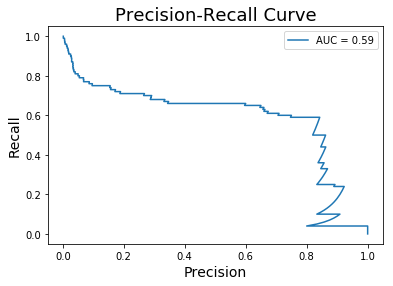

In [53]:
plt.figure(1)
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve))
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

In [54]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)

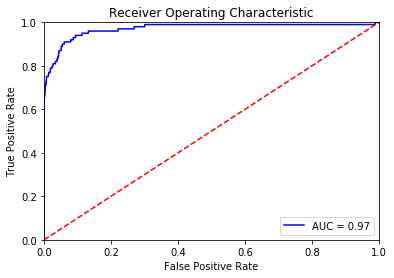

In [55]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Handle Data IMBALANCE

In [62]:
pd.Series(y_data).value_counts(normalize = True)#.plot(kind = 'bar') # highly imbalanced

0    0.998273
1    0.001727
Name: Class, dtype: float64

In [76]:
class_weight = {0: 0.30, 1: 0.70} #{0: 0.25, 1: 0.75} 

model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=700, class_weight=class_weight,verbose = 1)

Train on 227845 samples, validate on 56962 samples
Epoch 1/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0072 - acc: 0.9992 - val_loss: 0.0039 - val_acc: 0.9993
Epoch 2/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0071 - acc: 0.9992 - val_loss: 0.0040 - val_acc: 0.9993
Epoch 3/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0071 - acc: 0.9993 - val_loss: 0.0041 - val_acc: 0.9993
Epoch 4/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0070 - acc: 0.9993 - val_loss: 0.0041 - val_acc: 0.9993
Epoch 5/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0069 - acc: 0.9993 - val_loss: 0.0041 - val_acc: 0.9993
Epoch 6/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0068 - acc: 0.9993 - val_loss: 0.0043 - val_acc: 0.9992
Epoch 7/10
227845/227845 [==============================] - 1s 3us/sample - loss: 0.0068 - acc: 0.9993 - val_

In [77]:
y_pred = model.predict(X_test)
print(y_pred)
y_pred = (y_pred > 0.5)
print(y_pred)

[[1.1961162e-03]
 [8.6128712e-06]
 [2.0118356e-03]
 ...
 [8.1986189e-05]
 [7.6594501e-05]
 [1.6989433e-06]]
[[False]
 [False]
 [False]
 ...
 [False]
 [False]
 [False]]


In [78]:
cm1 = confusion_matrix(y_test, y_pred)
print(cm1)

[[56848    14]
 [   23    77]]


In [79]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56862
           1       0.85      0.77      0.81       100

    accuracy                           1.00     56962
   macro avg       0.92      0.88      0.90     56962
weighted avg       1.00      1.00      1.00     56962



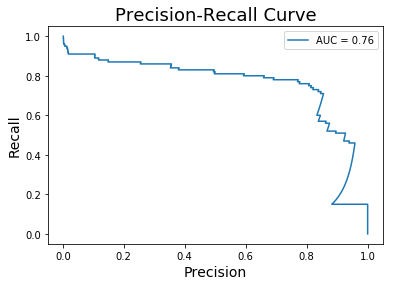

In [75]:
Y_pred_prob = model.predict_proba(X_test).ravel()
precision, recall, thresholds_pr = precision_recall_curve(y_test, Y_pred_prob)
precision, recall, thresholds_pr = precision_recall_curve(y_test, Y_pred_prob)
AUC_PRcurve= auc(recall, precision)
plt.figure(1)
#plot PR curve
plt.plot(precision, recall, label = "AUC = {:0.2f}".format(AUC_PRcurve))
plt.xlabel('Precision', fontsize = 14)
plt.ylabel('Recall', fontsize = 14)
plt.title('Precision-Recall Curve', fontsize = 18)
plt.legend(loc='best')
plt.show()

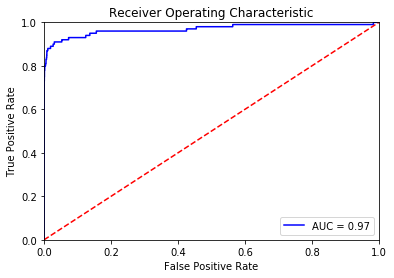

In [70]:
fpr, tpr, threshold = roc_curve(y_test, Y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#### Try using different neurons, activation functions, leraning rate, learnung decay, optimizer, and weight initializer

In [ ]:
#Talk about pip install h5py model.save()

In [80]:
model.save(r'D:\PERSONAL DATA\GREAT LEARNING\Course Online\Module 8 - Intro to Neural Networks and Deep Learning\Week 2\xxx.h5py')

In [ ]:
# b1x1 + b2x2 = predicted value